## Environment Set Up

In [0]:
# # Environment Set UP
# # load the environment
# # 安装最新版本Keras
# # https://keras.io/
# !pip install keras
# # 安装 XGBoost
# # https://github.com/dmlc/xgboost
# !pip install -q xgboost
# # 安装 7Zip
# !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive


# # 安装 PyDrive 操作库，该操作每个 notebook 只需要执行一次
# !pip install -U -q PyDrive

## Code for unzip file
# unzip
# import zipfile
# downloaded = drive.CreateFile({'id':'1lppUqbavyK9tJQxbb6pUJb7AtXgLQa7L'}) 
# downloaded.GetContentFile('mortality.zip')  
# with zipfile.ZipFile('mortality.zip', 'r') as zip_ref:
#     zip_ref.extractall('mortality_data')
#     zip_ref.close()
## Or use
#!unzip mortality.zip


## References:

CDC Cause-of-Death Analysis https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm (Links to an external site.)

ICD code:

https://www.cdc.gov/nchs/icd/icd10cm.htm (Links to an external site.)

allvalid2011 (detailed titles headings).pdfPreview the document

allvalid2011 (detailed titles headings).xlsPreview the document

## Import Package and authenrize 
（Start run from here）

In [0]:
# run this for anthentic
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# for data science

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import json
%matplotlib inline

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
# for file1 in file_list:
#   print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))
cdc_list = drive.ListFile({'q': "'144fnA-4uAmg9DXgqwH-cIpr2pGiaa_gk' in parents"}).GetList()
for _file in cdc_list:
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))
# print('connection succeed')

## Multi-class first attempt

In [0]:
##Multi class classification with KNN
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

multiData = pd.DataFrame(cur_df)
#multiData['icd_code_10th_revision'] = le.fit_transform(multiData.loc[multiData['icd_code_10th_revision'].isin(ten_ICD_features)])

#list(le.classes_)
ten_ICD_features = ['I251', 'C349', 'I219', 'J449', 'F03', 'G309', 'I64', 'I250', 'I500', 'J189']
x = multiData['icd_code_10th_revision'].isin(ten_ICD_features)


multiData['I251 - 0 '] = np.where(multiData['icd_code_10th_revision'].str.contains('I251'), 1, 0)
multiData['C349 - 1 '] = np.where(multiData['icd_code_10th_revision'].str.contains('C349'), 1, 0)
multiData['I219 - 2 '] = np.where(multiData['icd_code_10th_revision'].str.contains('I219'), 1, 0)
multiData['J449 - 3 '] = np.where(multiData['icd_code_10th_revision'].str.contains('J449'), 1, 0)
multiData['F03 - 4 '] = np.where(multiData['icd_code_10th_revision'].str.contains('F03'), 1, 0)
multiData['G309 - 5 '] = np.where(multiData['icd_code_10th_revision'].str.contains('G309'), 1, 0)
multiData['I64 - 6 '] = np.where(multiData['icd_code_10th_revision'].str.contains('I64'), 1, 0)
multiData['I250 - 7 '] = np.where(multiData['icd_code_10th_revision'].str.contains('I250'), 1, 0)
multiData['I500 - 8 '] = np.where(multiData['icd_code_10th_revision'].str.contains('I500'), 1, 0)
multiData['J189 - 9 '] = np.where(multiData['icd_code_10th_revision'].str.contains('J189'), 1, 0)
multiData['REST - 10 '] = np.where(~multiData['icd_code_10th_revision'].isin(ten_ICD_features), 1, 0)

new = multiData.filter(['icd_code_10th_revision','I251 - 0 ','C349 - 1 ','I219 - 2 ', 'J449 - 3 ', 'F03 - 4 ', 'G309 - 5 ', 'I64 - 6 ', 'I250 - 7 ', 'I500 - 8 ', 'J189 - 9 ', 'REST - 10 '], axis=1)

icds = ['I251 - 0 ', 'C349 - 1 ', 'I219 - 2 ', 'J449 - 3 ' , 'F03 - 4 ', 'G309 - 5 ', 'I64 - 6 ', 'I250 - 7 ', 'I500 - 8 ', 'J189 - 9 ', 'REST - 10 '] 

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)
/usr/local/lib/python3.6/dist-packages/nltk/sem/drt.py:498: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 44664), raddr=('74.125.195.132', 443)>
  class DrtAbstractVariableExpression(DrtExpression, AbstractVariableExpression):
/usr/local/lib/python3.6/dist-package

In [0]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import the model data
f_cdc = drive.CreateFile({'id':'1DNSbsqMccZBRlWam-dG38Q6pmtWfaqb3'})
f_cdc.GetContentFile('cdc.csv')
chunks=pd.read_csv('cdc.csv',chunksize=1000000)
cdc_df = pd.concat(chunks)

cdc_df.head()

multiData = pd.DataFrame(cdc_df)
#multiData['icd_code_10th_revision'] = le.fit_transform(multiData.loc[multiData['icd_code_10th_revision'].isin(ten_ICD_features)])
xval = ['month_of_death', 'day_of_week_of_death', 'race']
yval = ['icd_code_10th_revision']

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

X = multiData[xval]
y = multiData[yval]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


seed = 7
test_size = 0.33

from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47356), raddr=('74.125.195.95', 443)>
  return lambda tipo: (
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [0]:
##Multi class with XGBoost

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import the model data
f_cdc = drive.CreateFile({'id':'1DNSbsqMccZBRlWam-dG38Q6pmtWfaqb3'})
f_cdc.GetContentFile('cdc.csv')
chunks=pd.read_csv('cdc.csv',chunksize=1000000)
cdc_df = pd.concat(chunks)

multiData = pd.DataFrame(cdc_df)

multiData.head()

#multiData['icd_code_10th_revision'] = le.fit_transform(multiData.loc[multiData['icd_code_10th_revision'].isin(ten_ICD_features)])
xval = ['month_of_death', 'day_of_week_of_death', 'race']
yval = ['icd_code_10th_revision']

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

X = multiData[xval]
y = multiData[yval]

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=1)
xgb_model.fit(X, y)


/usr/lib/python3.6/sre_parse.py:506: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47770), raddr=('74.125.197.95', 443)>
  subpatternappend((LITERAL, _ord(this)))
/usr/lib/python3.6/sre_parse.py:506: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 35688), raddr=('74.125.195.132', 443)>
  subpatternappend((LITERAL, _ord(this)))
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWar

#### Data picture



['RESIDENTS', 'INTRASTATE NONRESIDENTS', 'INTERSTATE NONRESIDENTS', 'FOREIGN RESIDENTS']


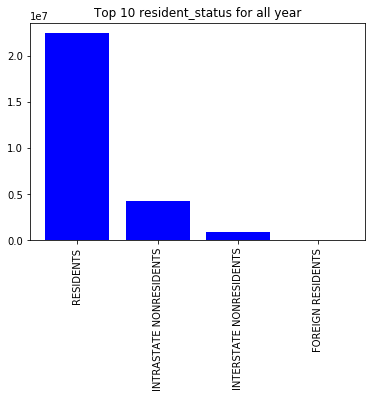

<Figure size 7200x7200 with 0 Axes>



['January', 'March', 'December', 'February', 'April', 'October', 'November', 'May', 'July', 'August']


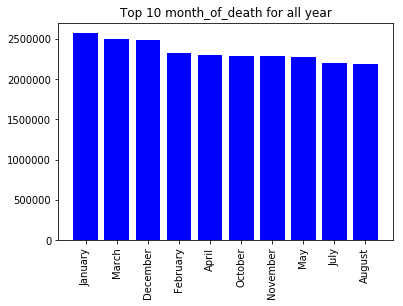

<Figure size 7200x7200 with 0 Axes>



['Female', 'Male']


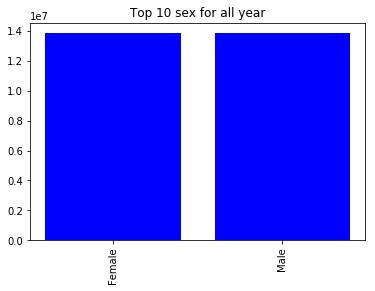

<Figure size 7200x7200 with 0 Axes>

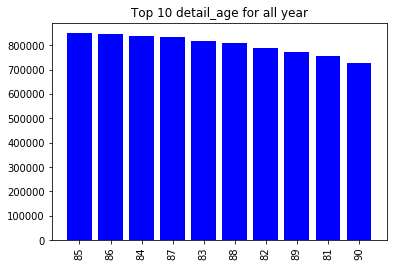

<Figure size 7200x7200 with 0 Axes>



['Hospital, clinic or Medical Center', 'Decedent’s home', 'Nursing home/long term care', 'Hospital, Clinic or Medical Center', 'Other', 'Hospice facility', 'Hospital, Clinic or Medical Center', 'Place of death unknown']


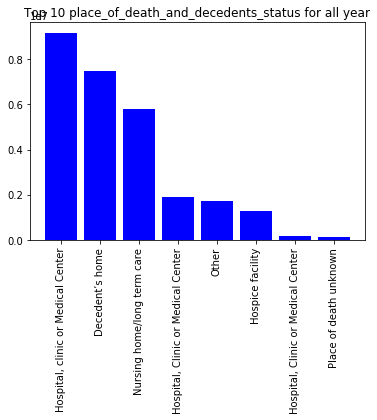

<Figure size 7200x7200 with 0 Axes>



['Married', 'Widowed', 'Divorced', 'Never married, single', 'Marital Status unknown']


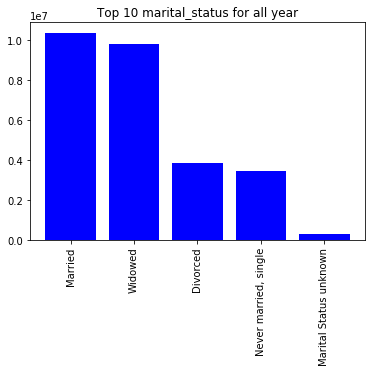

<Figure size 7200x7200 with 0 Axes>



['Saturday', 'Friday', 'Monday', 'Thursday', 'Wednesday', 'Sunday', 'Tuesday', 'Unknown']


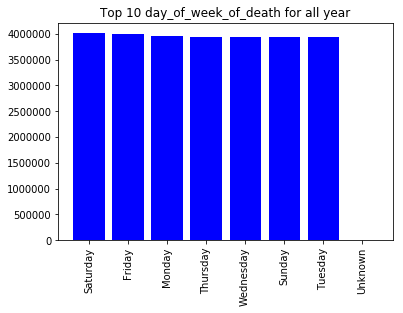

<Figure size 7200x7200 with 0 Axes>



['Unknown', 'No', 'Yes']


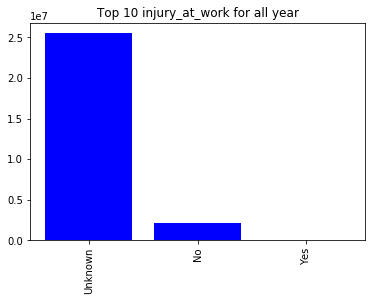

<Figure size 7200x7200 with 0 Axes>



['Burial', 'Unknown', 'Cremation', nan, nan, nan, 'Other']


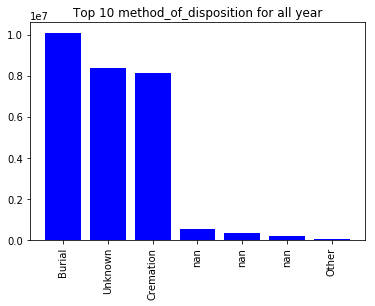

<Figure size 7200x7200 with 0 Axes>



['No', 'Unknown', 'Yes', nan, nan]


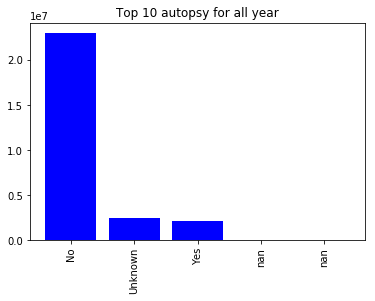

<Figure size 7200x7200 with 0 Axes>





['White', 'Black', 'American Indian (includes Aleuts and Eskimos)', 'Chinese', 'Filipino', 'Other Asian or Pacific Islander in areas reporting codes 18-58', 'Japanese', 'Asian Indian', 'Korean', 'Vietnamese']


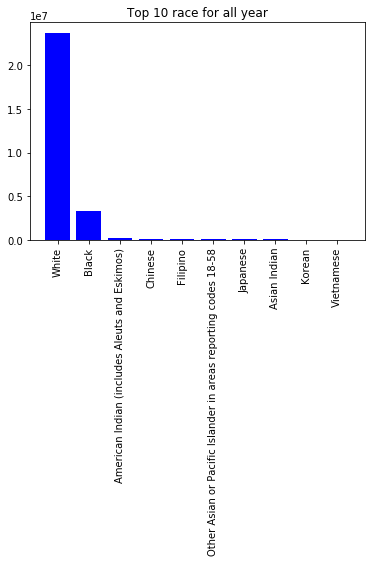

<Figure size 7200x7200 with 0 Axes>

In [0]:
#getTop10PicAllYear(icd_code_10th_revision_all_year, "Icd Code", json_2005, 'icd_code_10th_revision', False, 1)
print("\n")
getTop10PicAllYear(resident_status_all_year, "resident_status", json_2005, 'resident_status', False, 2)
print("\n")
getTop10PicAllYear(month_of_death_all_year, "month_of_death", json_2005, 'month_of_death', False, 4)
print("\n")
getTop10PicAllYear(sex_all_year, "sex", json_2005, 'sex', False, 5)
print("\n")
getTop10PicAllYear(detail_age_all_year, "detail_age", json_2005, 'detail_age', False, 2)
print("\n")
getTop10PicAllYear(place_of_death_and_decedents_status_all_year, 'place_of_death_and_decedents_status', json_2005, 'place_of_death_and_decedents_status', False, 5)
print("\n")
getTop10PicAllYear(marital_status_all_year, "marital_status", json_2005, 'marital_status', False, 5)
print("\n")
getTop10PicAllYear(day_of_week_of_death_all_year, "day_of_week_of_death", json_2005, 'day_of_week_of_death', False, 2)
print("\n")
getTop10PicAllYear(injury_at_work_all_year, "injury_at_work", json_2005, 'injury_at_work', False, 5)
print("\n")
getTop10PicAllYear(method_of_disposition_all_year, "method_of_disposition", json_2005, 'method_of_disposition', False, 5)
print("\n")
getTop10PicAllYear(autopsy_all_year, "autopsy", json_2005, 'autopsy', False, 5)
print("\n")
#getTop10PicAllYear(education_all_year, "education", json_2005, 'education', False, 1)
print("\n")
getTop10PicAllYear(race_all_year, "race", json_2005, 'race', False, 4)
print("\n")


['During unspecified activity', 'While working for income', 'While resting, sleeping, eating (vital activities)', 'While engaged in sports activity', 'While engaged in other specified activities', 'While engaged in leisure activity', 'While engaged in other types of work']


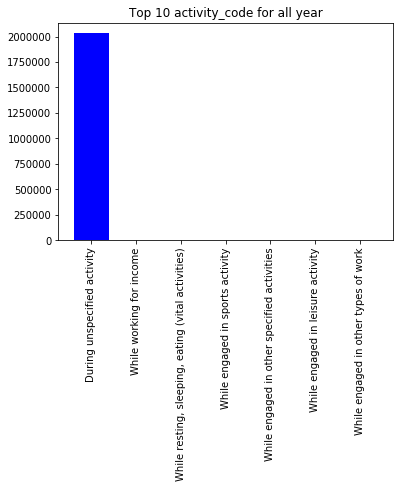

<Figure size 7200x7200 with 0 Axes>

In [0]:
getTop10PicAllYear(activity_code_all_year, 'activity_code', json_2005, 'activity_code', True, 2)
print("\n")

['Natural', 'Accident', 'Suicide', 'Homicide', 'Could not determine', 'Pending investigation']


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1986: ResourceWarning: unclosed <ssl.SSLSocket fd=98, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 41586), raddr=('172.217.212.95', 443)>
  origs = [(attr, getattr(obj, attr, sentinel)) for attr in kwargs]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1986: ResourceWarning: unclosed <ssl.SSLSocket fd=102, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 49664), raddr=('108.177.111.132', 443)>
  origs = [(attr, getattr(obj, attr, sentinel)) for attr in kwargs]


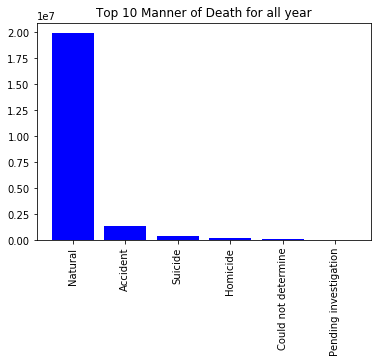

<Figure size 7200x7200 with 0 Axes>

In [0]:
getTop10PicAllYear(manner_of_death_all_year, "Manner of Death", json_2005, 'manner_of_death', True, 2)
print("\n")


['Extremely low birthweight or extreme immaturity (P07.0,P07.2)', 'Sudden infant death syndrome (R95)', 'Other perinatal conditions (P29,P70.3-P70.9,P71-P76,P78-P81,P83.0-P83.1, P83.3-P83.9,P90-P96)', 'Congenital malformations of heart (Q20-Q24)', 'Other symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R53,R55-R94,R96-R99)', 'Other low birthweight or preterm (P07.1,P07.3)', 'Newborn affected by premature rupture of membranes (P01.1)', 'Accidental suffocation and strangulation in bed (W75)', 'Bacterial sepsis of newborn (P36)', 'Respiratory distress of newborn (P22)']


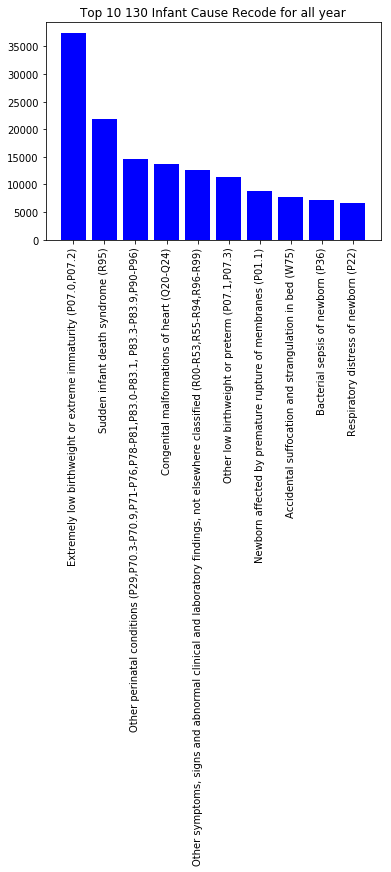

<Figure size 7200x7200 with 0 Axes>

In [0]:
getTop10PicAllYear(_130_infant_cause_code_all_year, '130 Infant Cause Recode', json_2005, '130_infant_cause_recode', True, 3)
print("\n")

['Home', 'Unspecified place', 'Other Specified Places', 'Residential institution', 'Street and highway', 'Trade and service area', 'School, other institution and public administrative', 'Industrial and construction area', 'Farm', 'Sports and athletics area']


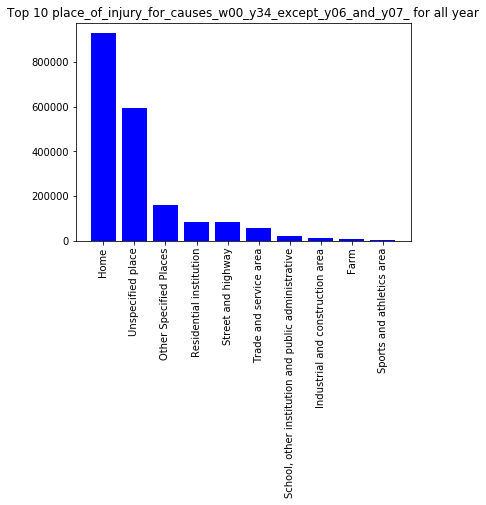

<Figure size 7200x7200 with 0 Axes>

In [0]:
getTop10PicAllYear(place_of_injury_for_causes_w00_y34_except_y06_and_y07__all_year, 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_', json_2005, 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_', True, 2)
print("\n")

### Predictor selection

#### one year data overview

In [0]:
df_merge.describe()

,resident_status,month_of_death,sex,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes,race,icd_code_10th_revision,education,age
count,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07,2.042056e+06,1.945947e+06,2.772067e+07,2.772067e+07,2.772067e+07,2.772067e+07
mean,1.226439e+00,6.432601e+00,4.999805e-01,3.542366e+00,2.065709e+00,4.011841e+00,9.232335e-01,2.265027e+00,2.497302e-01,8.976341e+00,3.843905e+00,1.634277e+00,2.024113e+03,3.511437e+00,7.292371e+01
std,5.013507e-01,3.520570e+00,5.000000e-01,2.151926e+00,1.532604e+00,2.003231e+00,2.728796e-01,2.591803e+00,5.877904e-01,4.143830e-01,4.129943e+00,5.115081e+00,1.250621e+03,1.930670e+00,2.158670e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00,8.370000e+02,2.000000e+00,6.300000e+01
50%,1.000000e+00,6.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,2.103000e+03,3.000000e+00,7.700000e+01
75%,1.000000e+00,1.000000e+01,1.000000e+00,6.000000e+00,4.000000e+00,6.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,9.000000e+00,9.000000e+00,1.000000e+00,2.403000e+03,4.000000e+00,8.600000e+01
max,4.000000e+00,1.200000e+01,1.000000e+00,9.000000e+00,4.000000e+00,9.000000e+00,2.000000e+00,6.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,7.800000e+01,5.551000e+03,9.000000e+00,9.990000e+02


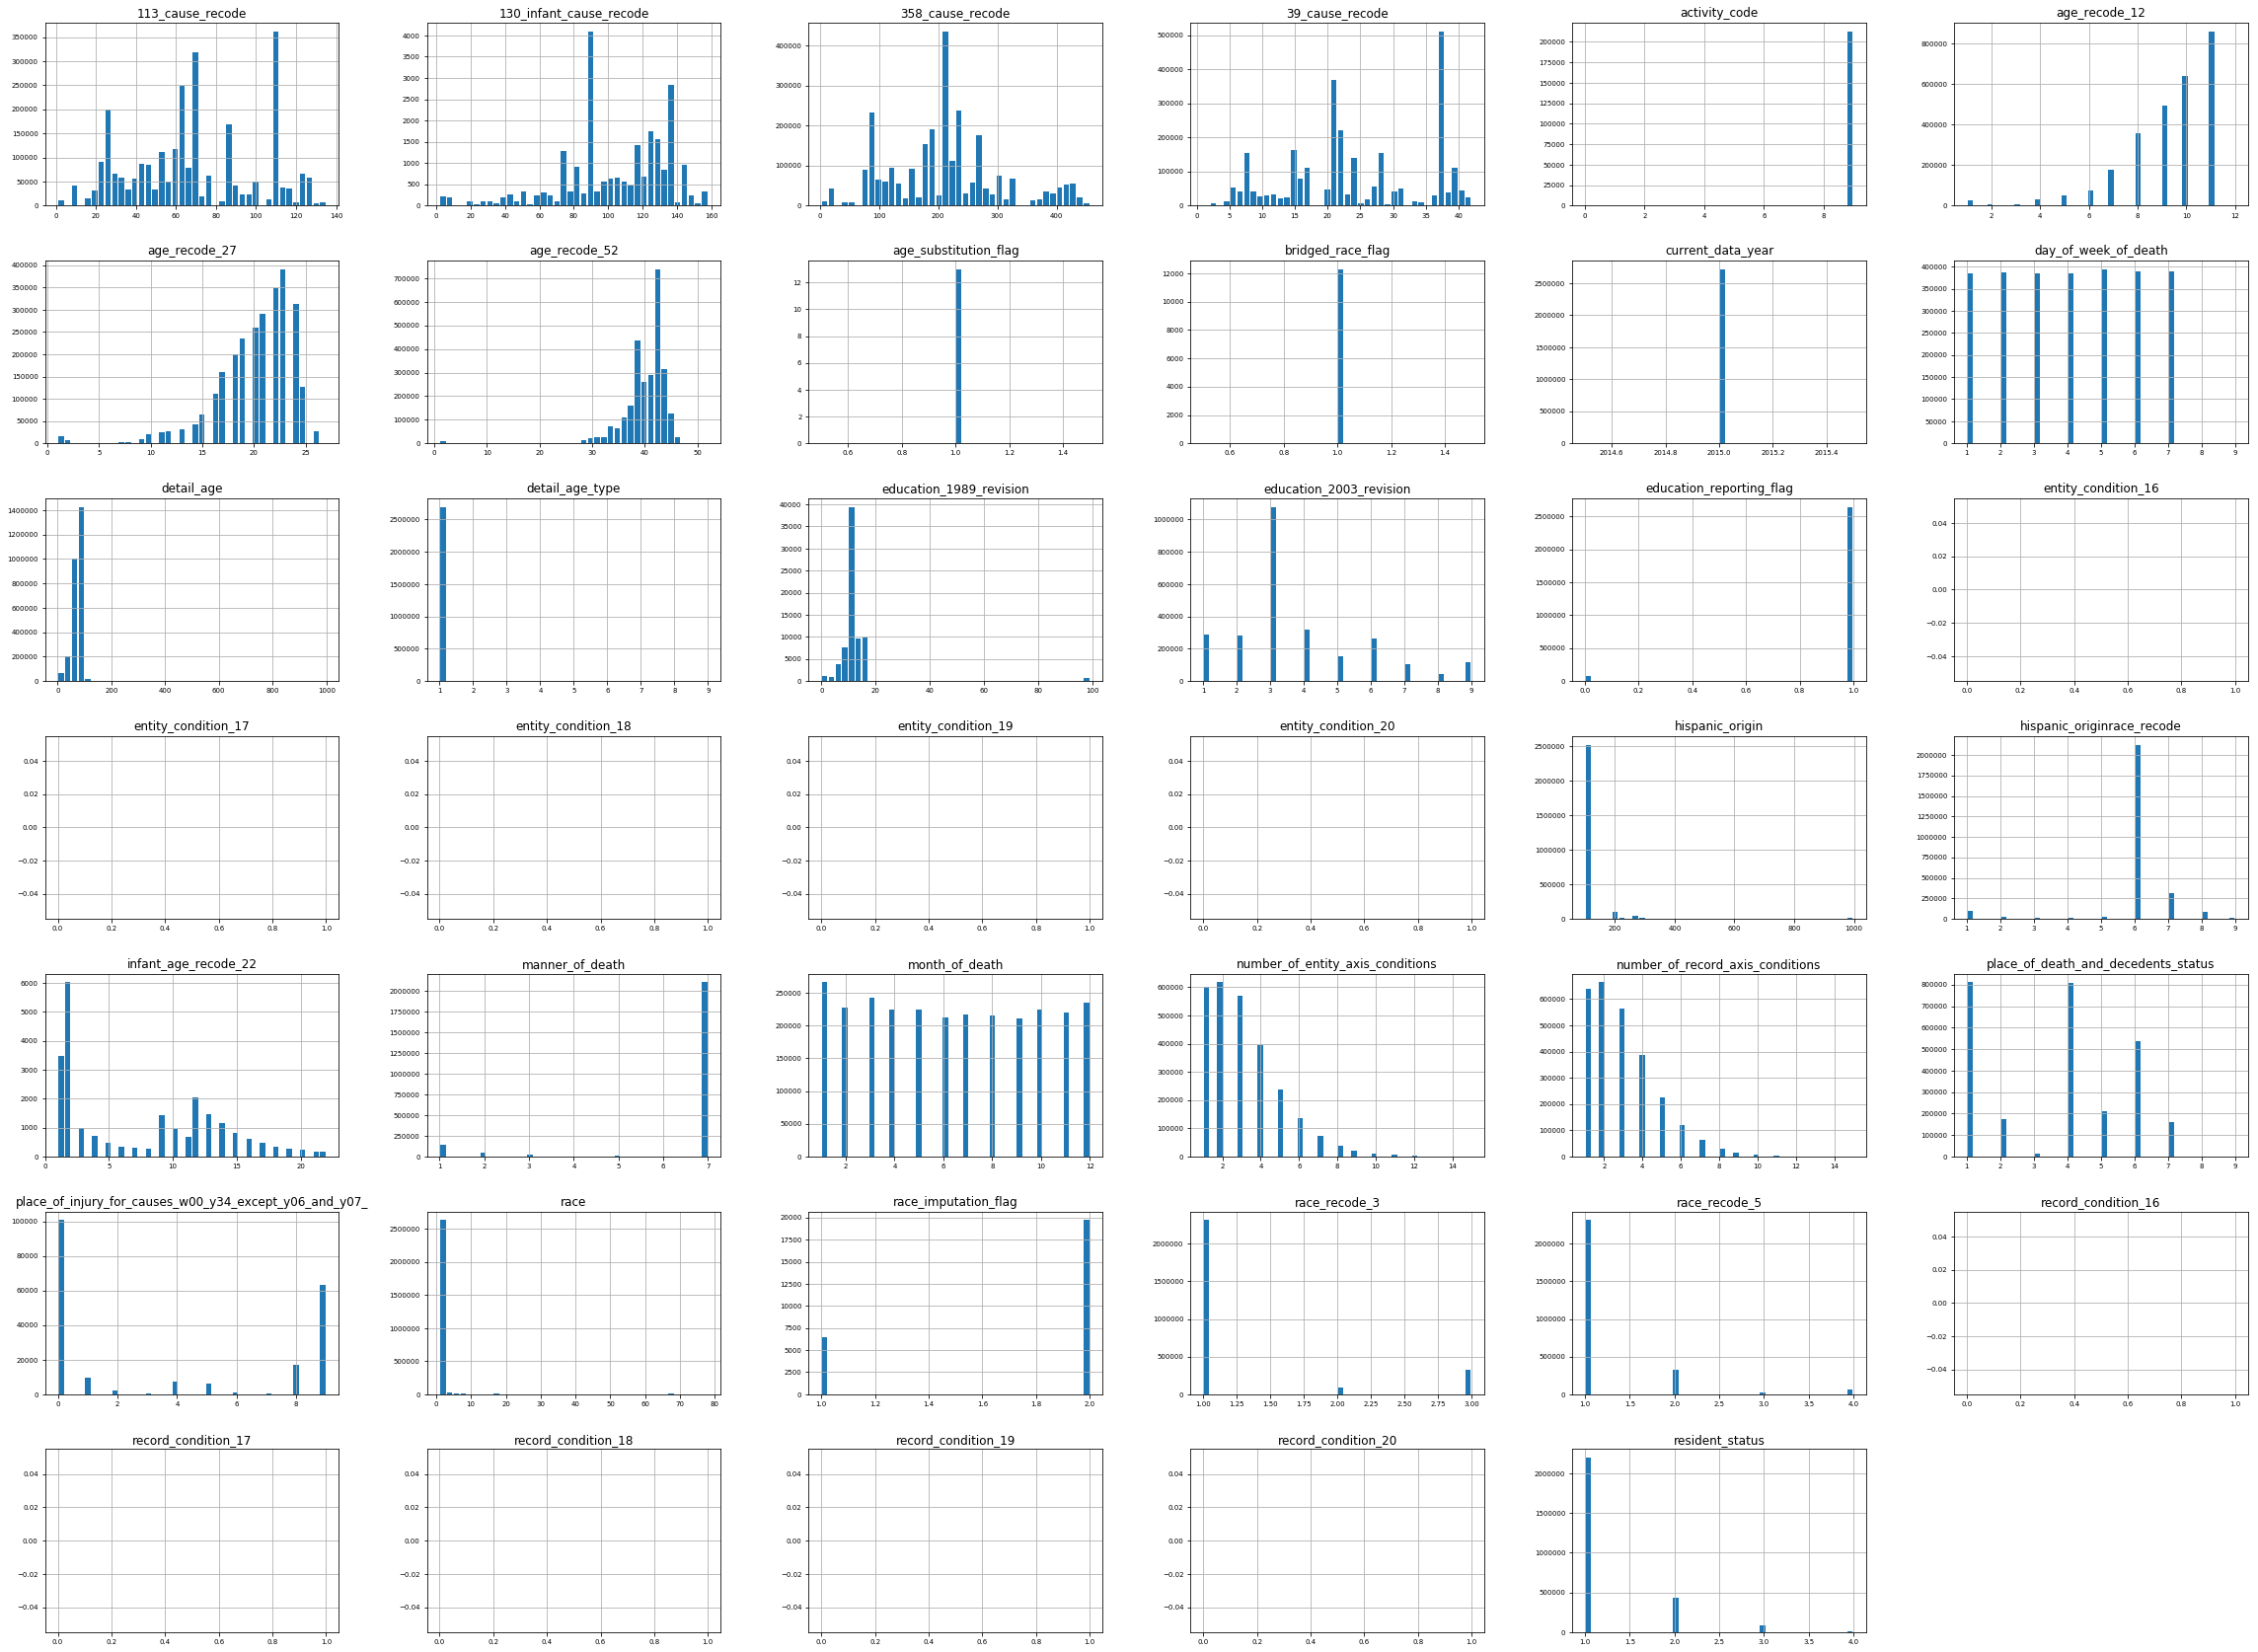

In [0]:
"""# histogram
df.hist(xlabelsize=7, ylabelsize=7, figsize=(40,30), bins=40, rwidth=0.8)
plt.show()"""

#### correlation plot

In [0]:
#load 2015_data
df,j15=load_data(2015)

In [0]:
#select notnull columns
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_recode_52', 'age_recode_27','age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status','day_of_week_of_death', 'injury_at_work',
       'method_of_disposition', 'autopsy', 'activity_code','place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'race', 'race_imputation_flag', 'race_recode_3', 'race_recode_5', 'hispanic_origin',
       'manner_of_death', '358_cause_recode', '113_cause_recode','130_infant_cause_recode', '39_cause_recode','icd_code_10th_revision']]

SyntaxError: ignored

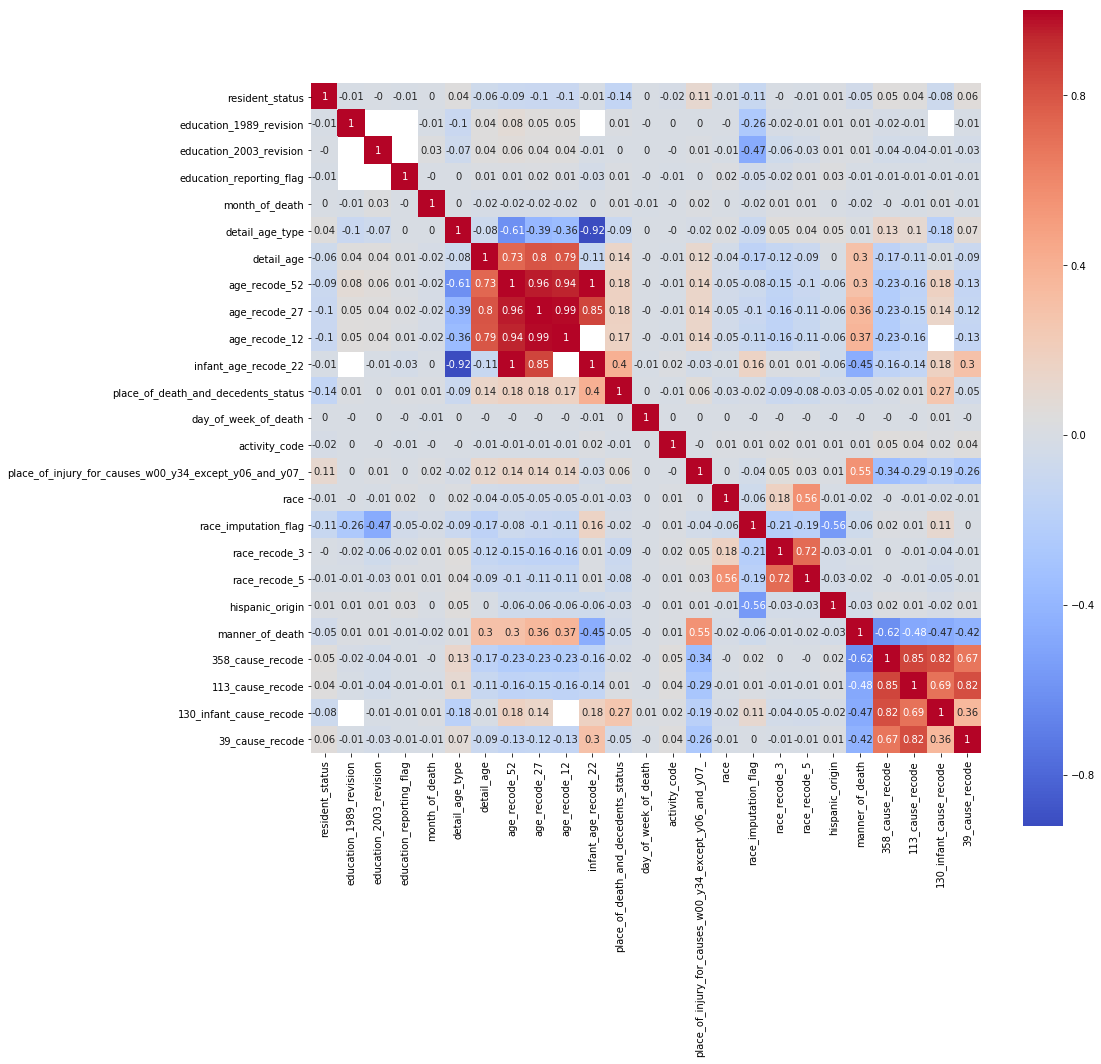

In [0]:
# plot correlation plot of one year dataset
dfData = df_.corr().round(1)
plt.subplots(figsize=(15, 15)) 
sns.heatmap(dfData, vmax=1, annot=True, square=True, cmap='coolwarm')
plt.show()

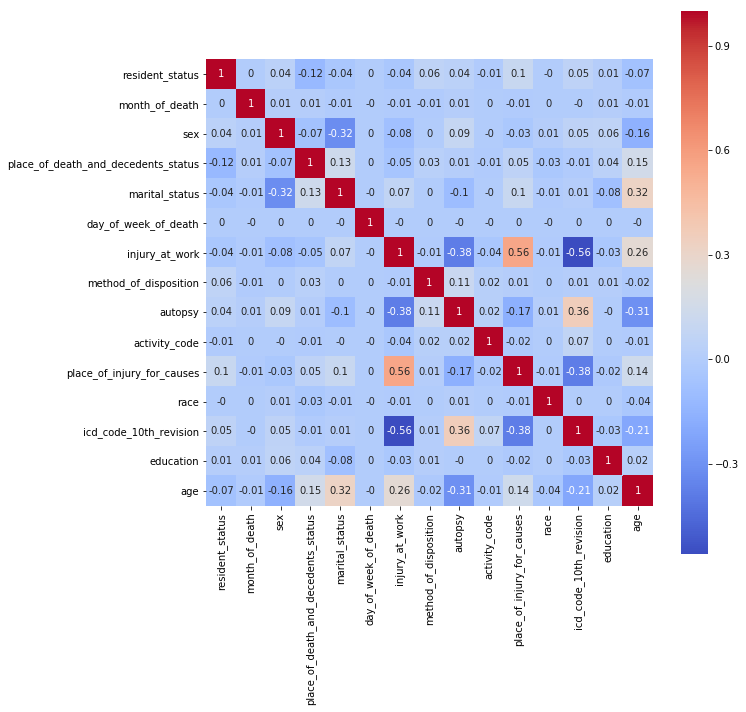

In [0]:
# plot new correlation plot for 10 years selected pedictors 
dfData = df_merge.corr().round(2)
plt.subplots(figsize=(10, 10)) 
sns.heatmap(dfData, vmax=1, annot=True, square=True, cmap='coolwarm')
plt.show()

#### Skewness and outlier analysis

Text(0, 0.5, 'number of people dead')

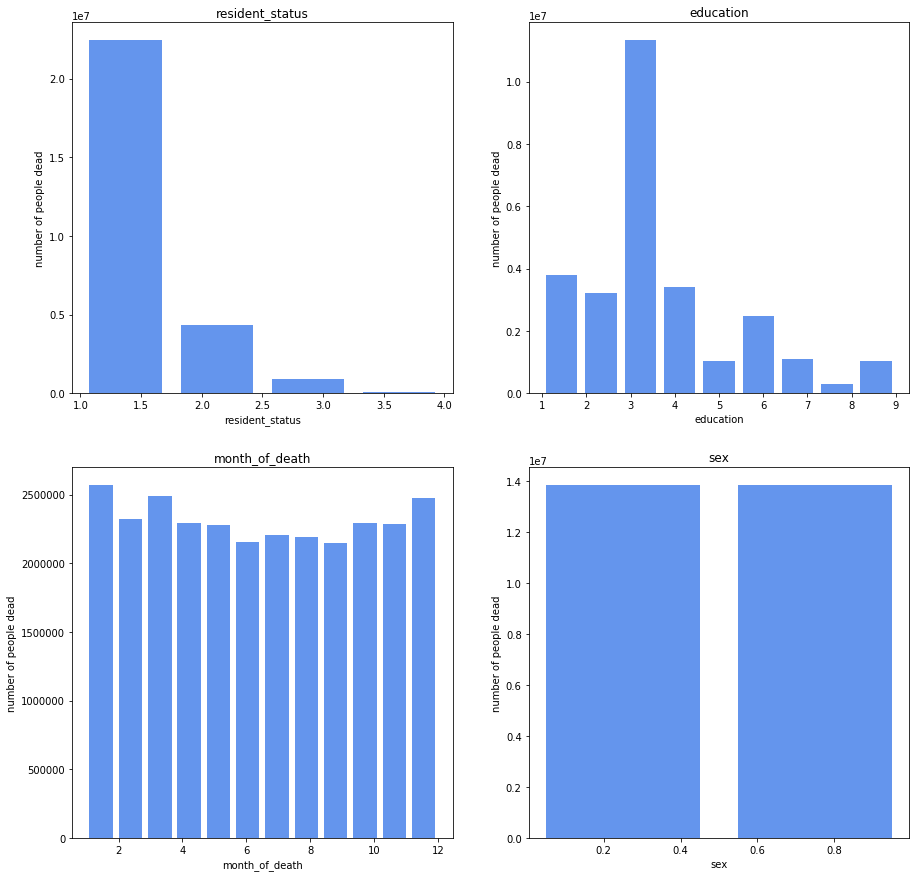

In [0]:
# hist1
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.hist(df_merge['resident_status'], bins = 4, rwidth=0.8, color='cornflowerblue')
plt.title('resident_status')
plt.xlabel('resident_status')
plt.ylabel('number of people dead')

plt.subplot(222)
plt.hist(df_merge['education'], bins = 9, rwidth=0.8, color='cornflowerblue')
plt.title('education')
plt.xlabel('education')
plt.ylabel('number of people dead')

plt.subplot(223)
plt.hist(df_merge['month_of_death'], bins = 12, rwidth=0.8, color='cornflowerblue')
plt.title('month_of_death')
plt.xlabel('month_of_death')
plt.ylabel('number of people dead')

plt.subplot(224)
plt.hist(df_merge['sex'], bins = 2, rwidth=0.8, color='cornflowerblue')
plt.title('sex')
plt.xlabel('sex')
plt.ylabel('number of people dead')

Text(0, 0.5, 'number of people dead')

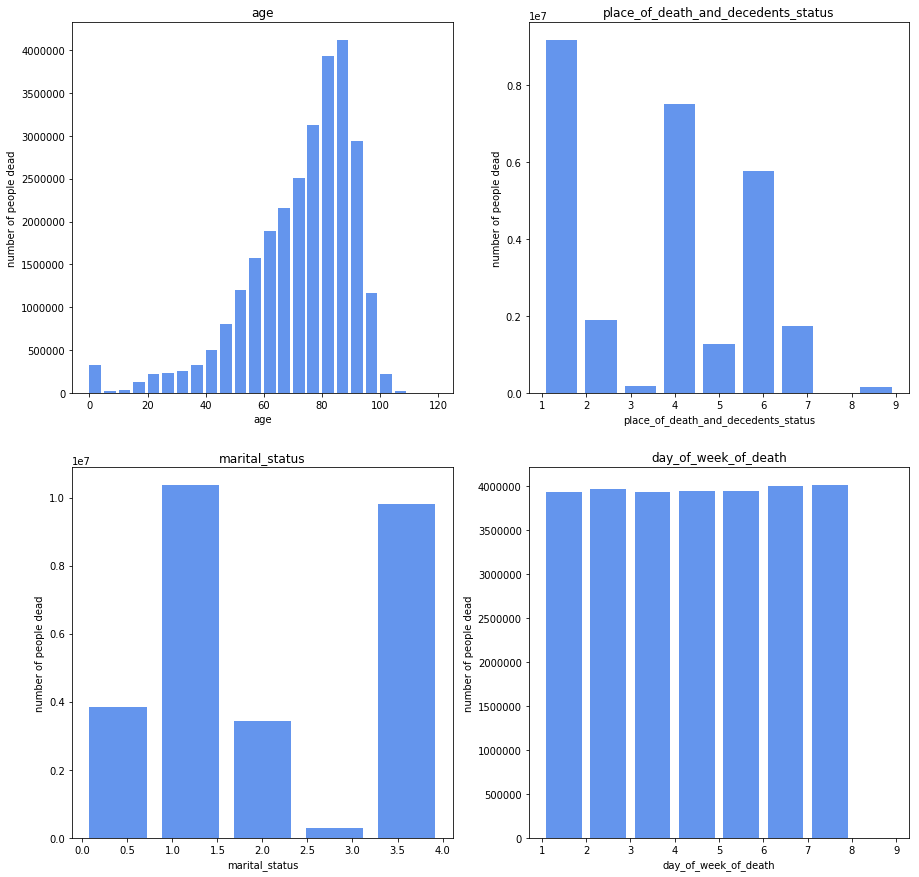

In [0]:
# hist 2
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.hist(df_merge['age'], bins = np.arange(-0.5, 120, 5),rwidth=0.8, color='cornflowerblue')
#plt.hist(df1['age'], bins = np.arange(-0.5, 120, 5),rwidth=0.8, color = 'lightcoral')
plt.title('age')
plt.xlabel('age')
plt.ylabel('number of people dead')

plt.subplot(222)
plt.hist(df_merge['place_of_death_and_decedents_status'], bins = 9, rwidth=0.8, color='cornflowerblue')
plt.title('place_of_death_and_decedents_status')
plt.xlabel('place_of_death_and_decedents_status')
plt.ylabel('number of people dead')

plt.subplot(223)
plt.hist(df_merge['marital_status'], bins = 5, rwidth=0.8, color='cornflowerblue')
plt.title('marital_status')
plt.xlabel('marital_status')
plt.ylabel('number of people dead')

plt.subplot(224)
plt.hist(df_merge['day_of_week_of_death'], bins = 8, rwidth=0.8, color='cornflowerblue')
plt.title('day_of_week_of_death')
plt.xlabel('day_of_week_of_death')
plt.ylabel('number of people dead')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'number of people dead')

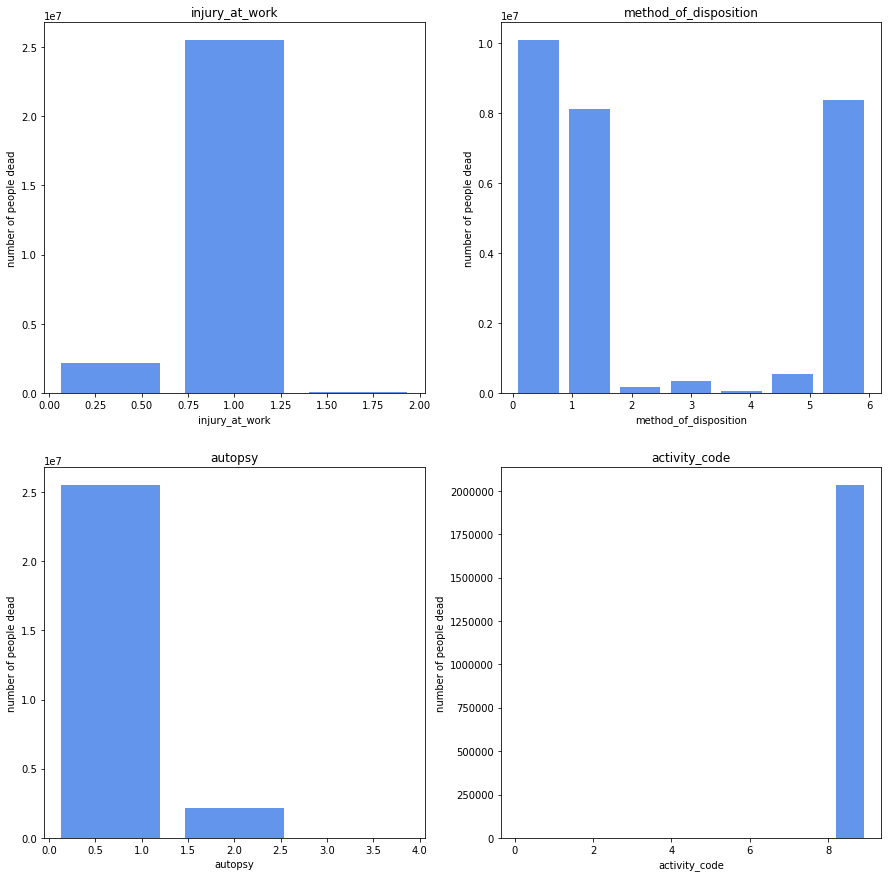

In [0]:
# hist3
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.hist(df_merge['injury_at_work'], bins = 3, rwidth=0.8, color='cornflowerblue')
plt.title('injury_at_work')
plt.xlabel('injury_at_work')
plt.ylabel('number of people dead')

plt.subplot(222)
plt.hist(df_merge['method_of_disposition'], bins = 7, rwidth=0.8, color='cornflowerblue')
plt.title('method_of_disposition')
plt.xlabel('method_of_disposition')
plt.ylabel('number of people dead')

plt.subplot(223)
plt.hist(df_merge['autopsy'], bins = 3, rwidth=0.8, color='cornflowerblue')
plt.title('autopsy')
plt.xlabel('autopsy')
plt.ylabel('number of people dead')

plt.subplot(224)
plt.hist(df_merge['activity_code'], bins = 10, rwidth=0.8, color='cornflowerblue')
plt.title('activity_code')
plt.xlabel('activity_code')
plt.ylabel('number of people dead')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'number of people dead')

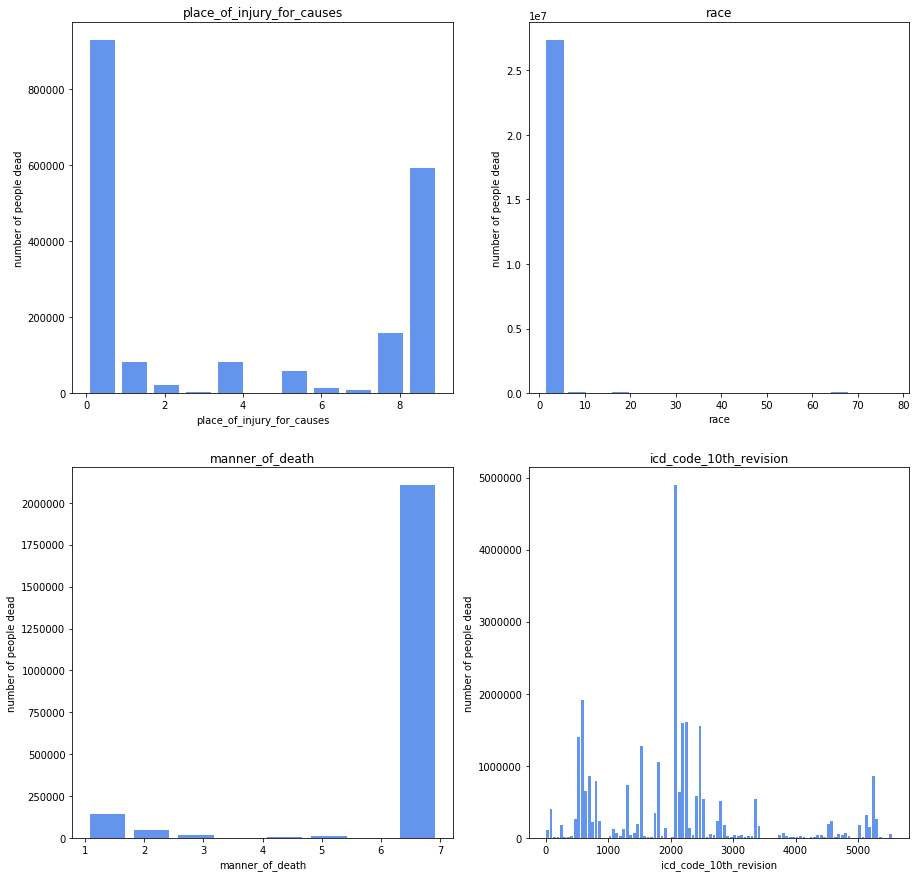

In [0]:
# hist4
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.hist(df_merge['place_of_injury_for_causes'], bins = 11, rwidth=0.8, color='cornflowerblue')
plt.title('place_of_injury_for_causes')
plt.xlabel('place_of_injury_for_causes')
plt.ylabel('number of people dead')

plt.subplot(222)
plt.hist(df_merge['race'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('race')
plt.xlabel('race')
plt.ylabel('number of people dead')

plt.subplot(223)
plt.hist(df['manner_of_death'], bins = 8, rwidth=0.8, color='cornflowerblue')
plt.title('manner_of_death')
plt.xlabel('manner_of_death')
plt.ylabel('number of people dead')

plt.subplot(224)
plt.hist(df_merge['icd_code_10th_revision'], bins = 100, rwidth=0.8, color='cornflowerblue')
plt.title('icd_code_10th_revision')
plt.xlabel('icd_code_10th_revision')
plt.ylabel('number of people dead')

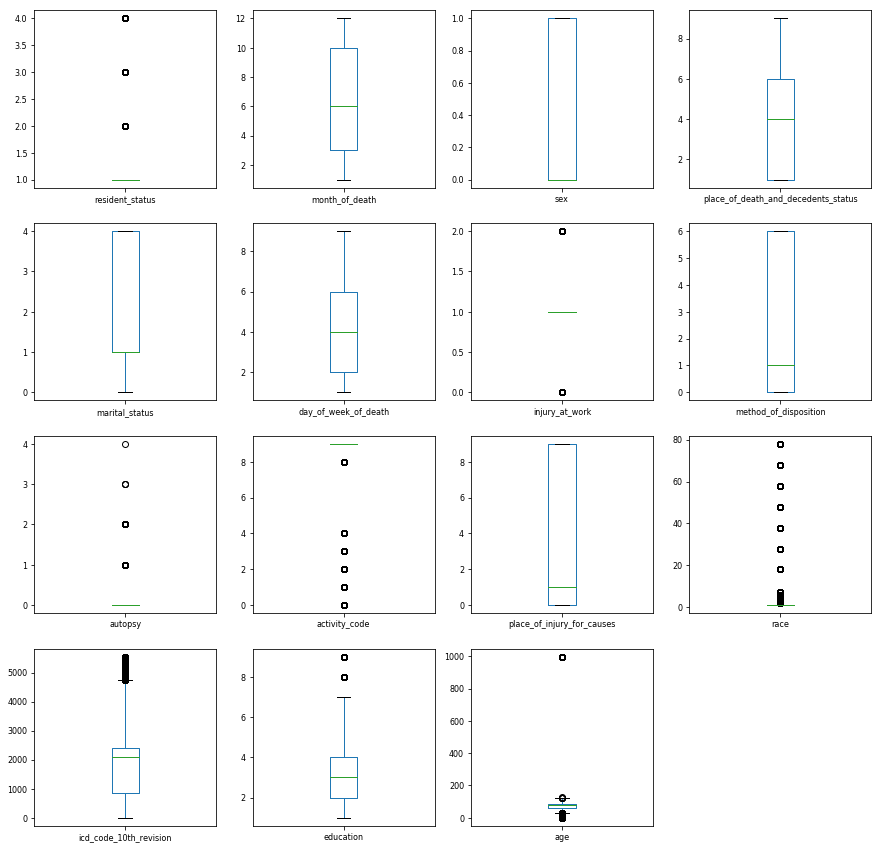

In [0]:
# boxplot
df_merge.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8,figsize=(15,15))
plt.show()

scatter plot


In [0]:
x=df_merge['autopsy']
y=df_merge['age']

#设置X轴标签
plt.xlabel('X')
#设置Y轴标签
plt.ylabel('Y')
#画散点图
plt.scatter(x,y,c='r',marker='x')
#设置图标
plt.legend('x1')
#显示所画的图
plt.show()


KeyboardInterrupt: ignored

In [0]:
x=df_merge['autopsy']
y=df_merge['age']

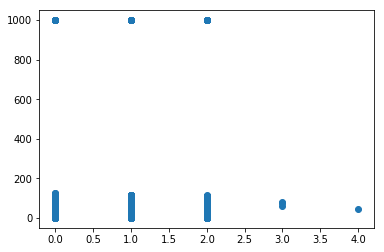

In [0]:
plt.scatter(x,y)

### Mortality data Analytics

#### Data Preview Final Version

In [0]:
df_2007, json_2007 = load_data(2007)

/usr/lib/python3.6/importlib/_bootstrap_external.py:487: ResourceWarning: unclosed <ssl.SSLSocket fd=67, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 52850), raddr=('64.233.188.95', 443)>
  code = marshal.loads(data)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:127: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42934), raddr=('64.233.189.95', 443)>
  return lambda tipo: (issubclass(tipo, klasses) and
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:127: ResourceWarning: unclosed <ssl.SSLSocket fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 50352), raddr=('108.177.125.95', 443)>
  return lambda tipo: (issubclass(tipo, klasses) and
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,59,60,61,62

File search/load complete.


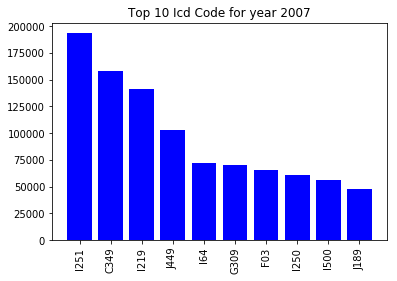

<Figure size 3600x3600 with 0 Axes>

In [0]:
getTop10Pic('icd_code_10th_revision', 2007, "Icd Code", j_data, 1, False)

In [0]:
C349

{}

In [0]:
df_2005, json_2005 = load_data(2005)

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:127: ResourceWarning: unclosed <ssl.SSLSocket fd=67, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45452), raddr=('64.233.189.95', 443)>
  return lambda tipo: (issubclass(tipo, klasses) and
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


File search/load complete.


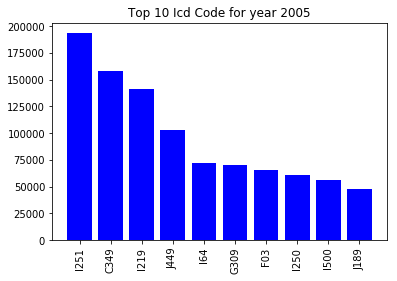

<Figure size 3600x3600 with 0 Axes>

In [0]:
getTop10Pic('icd_code_10th_revision', 2005, "Icd Code", j_data, 1, False)

In [0]:
I251 = {}
C349 = {}
I219 = {}
J449 = {}
I64 = {}
G309 = {}
I250 = {}
I500 = {}
J189 = {}
F03 = {}

In [0]:
population = 

In [0]:
def calRatio(dictionary, population):
  res = {}
  for i in range(len(dictionary))

TypeError: ignored

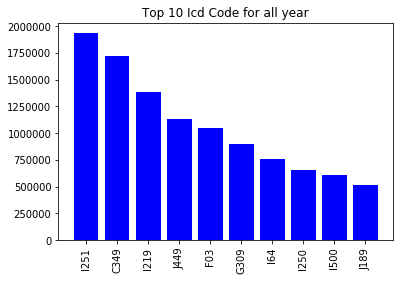

In [0]:
getTop10PicAllYear(icd_code_10th_revision_all_year, "Icd Code", json_2005, 'icd_code_10th_revision', False, 1)
print("\n")

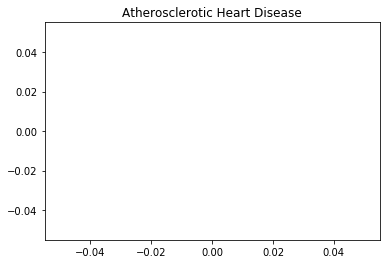

In [0]:
plt.bar(I251.keys(), I251.values(), color='cornflowerblue')
plt.title("Atherosclerotic Heart Disease")
plt.show()

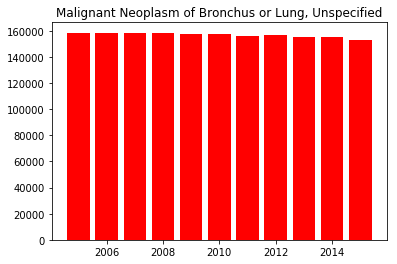

In [0]:
plt.bar(C349.keys(), C349.values(), color='red')
plt.title("Malignant Neoplasm of Bronchus or Lung, Unspecified")
plt.show()

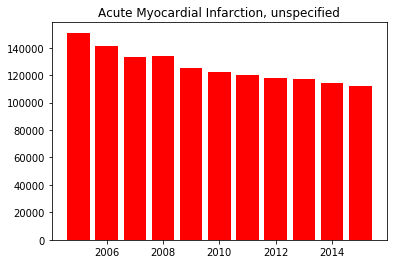

In [0]:
plt.bar(I219.keys(), I219.values(), color='red')
plt.title("Acute Myocardial Infarction, unspecified")
plt.show()

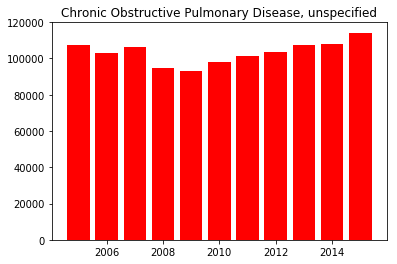

In [0]:
plt.bar(J449.keys(), J449.values(), color='red')
plt.title("Chronic Obstructive Pulmonary Disease, unspecified")
plt.show()

/usr/local/lib/python3.6/dist-packages/cycler.py:374: ResourceWarning: unclosed <ssl.SSLSocket fd=101, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45028), raddr=('64.233.189.132', 443)>
  for k in keys:
/usr/local/lib/python3.6/dist-packages/cycler.py:374: ResourceWarning: unclosed <ssl.SSLSocket fd=97, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45106), raddr=('64.233.189.132', 443)>
  for k in keys:
/usr/local/lib/python3.6/dist-packages/cycler.py:374: ResourceWarning: unclosed <ssl.SSLSocket fd=98, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45172), raddr=('64.233.189.132', 443)>
  for k in keys:


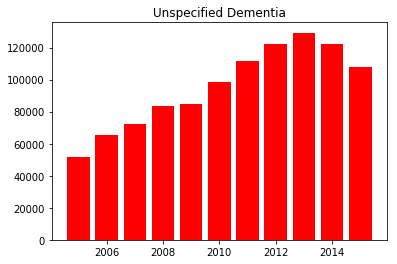

In [0]:
plt.bar(F03.keys(), F03.values(), color='red')
plt.title("Unspecified Dementia")
plt.show()

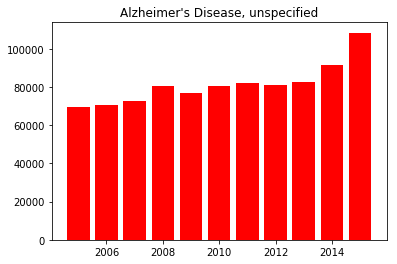

In [0]:
plt.bar(G309.keys(), G309.values(), color='red')
plt.title("Alzheimer's Disease, unspecified")
plt.show()

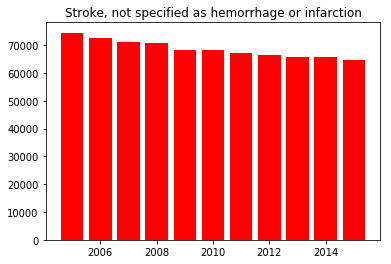

In [0]:
plt.bar(I64.keys(), I64.values(), color='red')
plt.title("Stroke, not specified as hemorrhage or infarction")
plt.show()

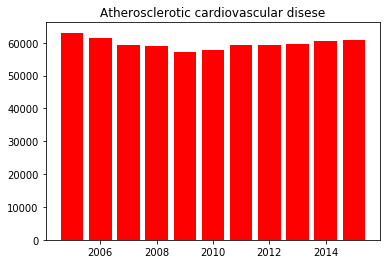

In [0]:
plt.bar(I250.keys(), I250.values(), color='red')
plt.title("Atherosclerotic cardiovascular disese")
plt.show()

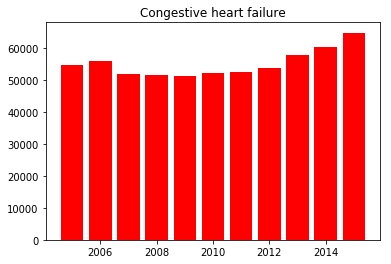

In [0]:
plt.bar(I500.keys(), I500.values(), color='red')
plt.title("Congestive heart failure")
plt.show()

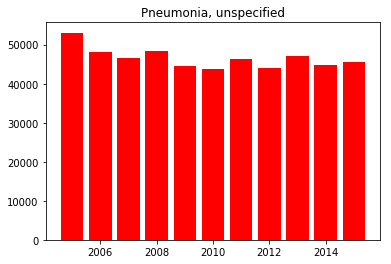

In [0]:
plt.bar(J189.keys(), J189.values(), color='red')
plt.title("Pneumonia, unspecified")
plt.show()

In [0]:
def append(Code, num, year):
  for i in range(len(Code)):
    if Code[i] == "I251":
      I251.update({year : num[i]})
    elif Code[i] == "C349":
      C349.update({year : num[i]})
    elif Code[i] == "I219":
      I219.update({year : num[i]})
    elif Code[i] == "J449":
      J449.update({year : num[i]})
    elif Code[i] == "I64":
      I64.update({year : num[i]})
    elif Code[i] == "G309":
      G309.update({year : num[i]})
    elif Code[i] == "I250":
      I250.update({year : num[i]})
    elif Code[i] == "I500":
      I500.update({year : num[i]})
    elif Code[i] == "J189":
      J189.update({year : num[i]})
    elif Code[i] == "F03":
      F03.update({year : num[i]})
      

/usr/local/lib/python3.6/dist-packages/IPython/core/compilerop.py:100: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 43970), raddr=('64.233.189.95', 443)>
  return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
/usr/local/lib/python3.6/dist-packages/IPython/core/compilerop.py:100: ResourceWarning: unclosed <ssl.SSLSocket fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 44662), raddr=('108.177.125.132', 443)>
  return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)


In [0]:
def drawPicture(targetList, year, nameOfCode, j_data, dataName, order):
  Code = []
  num = []
  for i in range(len(targetList)):
    Code.append(targetList[i][0])
    num.append(targetList[i][1])
  
  death_names = Code
  if dataName == "icd_code_10th_revision":
    append(Code, num, year)
    
  if dataName != "icd_code_10th_revision":
    if order == 1:
  #change to string
      name_code = pd.Series(Code).astype(str).apply(lambda x : x.zfill(3))
    elif order == 2:
      name_code = pd.Series(Code).astype(int).astype(str).apply(lambda x : x.zfill(3))
    elif order == 3:
      name_code = pd.Series(Code).astype(int).astype(str)
  #map with json
    death_names = name_code.map(j_data[dataName]).tolist()
    print(death_names)
  
  x_axis = np.arange(len(targetList))
  plt.bar(x_axis, num, color="blue")
  plt.xticks(x_axis, death_names, rotation = "vertical")
  plt.title("Top 10 " + nameOfCode + " for year {}".format(year))
  plt.figure(figsize=(50, 50))
  plt.tight_layout()
  plt.show()

In [0]:
def getTop10Pic(dataName, year, name, jsonDataSet, order, dropna):
  uniFor358Recode, cntFor358Recode = np.unique(morDataCopy[dataName], return_counts = True)
  if dropna:
    uniFor358RecodeCopy = uniFor358Recode[~np.isnan(uniFor358Recode)].tolist()
    cntFor358Recode2 = cntFor358Recode[0:len(uniFor358RecodeCopy)]
    dictUniFor358Recode = dict(zip(uniFor358RecodeCopy, cntFor358Recode2))
  else:
    dictUniFor358Recode = dict(zip(uniFor358Recode, cntFor358Recode))
  sortUniFor358Recode = sorted(dictUniFor358Recode.items(), key = lambda x: -x[1])[:10]
  drawPicture(sortUniFor358Recode, year, name, jsonDataSet, dataName, order)

In [0]:
for year in range (2005, 2016):
  morData, j_data = load_data(year)
  if year == 2012:
    morDataCopy = morData[['manner_of_death','icd_code_10', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode']]
    morDataCopy.columns = [['manner_of_death','icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode']]
  else:
    morDataCopy = morData[['manner_of_death', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode']]
  
    
  print("The followings are the data preview for {} data:".format(year))
  print("\n")
  print(morDataCopy.head())
  print("\n")
  print('Describe for mortality data for {}'.format(year))
  print(morDataCopy.describe())
  print("\n")
  
  getTop10Pic('icd_code_10th_revision', year, "Icd Code", j_data, 1, False)
    
  print("\n")
  getTop10Pic('358_cause_recode', year, "358 Cause Recode", j_data, 1, False)
  print("\n")
  getTop10Pic('113_cause_recode', year, "113 Cause Recode", j_data, 1, False)
  print("\n")
  getTop10Pic('39_cause_recode', year, "39 Cause Recode", j_data, 1, False)
  print("\n")
  getTop10Pic('130_infant_cause_recode', year, "130 Cause Recode", j_data, 2, True)
  print("\n")
  getTop10Pic('manner_of_death', year, "Manner of Death", j_data, 3, True)
  print("\n")
  

Output hidden; open in https://colab.research.google.com to view.

In [0]:
uniFor130Recode, cntFor130Recode = np.unique(morDataCopy['130_infant_cause_recode'], return_counts = True)
  uniFor130RecodeCopy = uniFor130Recode[~np.isnan(uniFor130Recode)].tolist()
  dictUniFor130Recode = {}
  for i in range(len(uniFor130RecodeCopy)):
    dictUniFor130Recode.update({uniFor130Recode[i] : cntFor130Recode[i]})
  
  sortUniFor130Recode = sorted(dictUniFor130Recode.items(), key = lambda x: -x[1])[:10]
  drawPicture(sortUniFor130Recode, year, "130 Cause Recode", j_data, '130_infant_cause_recode', 2)
  #drawPicture3(sortUniFor130Recode, year, "130 Cause Recode", j_data, '130_infant_cause_recode', 2)
  
  uniForMoD, cntForMoD = np.unique(morDataCopy['manner_of_death'], return_counts = True)
  uniForMoDCopy = uniForMoD[~np.isnan(uniForMoD)]
  dictUniForMoD = {}
  for i in range(len(uniForMoDCopy)):
    dictUniForMoD.update({uniForMoD[i] : cntForMoD[i]})
  
  sortUniForMoD = sorted(dictUniForMoD.items(), key = lambda x: -x[1])[:10]
  drawPicture(sortUniForMoD, year, "Manner of Death", j_data, 'manner_of_death', 3)

### Data Picture for All Year

In [0]:
icd_code_all_year = []
manner_of_death_all_year = []
_358_cause_code_all_year = []
_113_cause_code_all_year = []
_130_infant_cause_code_all_year = []
_39_cause_code_all_year = []


In [0]:
def getTop10PicAllYear(dataSet, name, jsonDataSet, dataName, dropna, order):
  uni, cnt = np.unique(dataSet, return_counts = True)
  if dropna:
    uniCopy = uni[~np.isnan(uni)].tolist()
    cnt2 = cnt[0:len(uniCopy)]
    diction = dict(zip(uniCopy, cnt2))
  else:
    diction = dict(zip(uni, cnt))
    
  sortres = sorted(diction.items(), key = lambda x : -x[1])[:10]
  drawPictureAllYear(sortres, 2005, name, jsonDataSet, dataName, order)

In [0]:
def drawPictureAllYear(targetList, year, nameOfCode, j_data, dataName, order):
  Code = []
  num = []
  for i in range(len(targetList)):
    Code.append(targetList[i][0])
    num.append(targetList[i][1])
  
  death_names = Code
  if dataName != "icd_code_10th_revision" and dataName != "detail_age":
  #change to string
    if order == 1:
      name_code = pd.Series(Code).astype(str).apply(lambda x : x.zfill(3))
    elif order == 2:
      name_code = pd.Series(Code).astype(int).astype(str)
    elif order == 3:
      name_code = pd.Series(Code).astype(int).astype(str).apply(lambda x : x.zfill(3))
    elif order == 4:
      name_code = pd.Series(Code).astype(int).astype(str).apply(lambda x : x.zfill(2))
    elif order == 5:
      name_code = pd.Series(Code).astype(str)
  #map with json
    death_names = name_code.map(j_data[dataName]).tolist()
    dict(zip(Code, death_names))
  
  
  x_axis = np.arange(len(targetList))
  plt.bar(x_axis, num, color="blue")
  plt.xticks(x_axis, Code, rotation = "vertical")
  plt.title("Top 10 " + nameOfCode + " for all year")
  plt.figure(plot_width=400, plot_height=400)
  plt.tight_layout()
  plt.show()

In [0]:
for year in range (2005, 2007):
  morData, j_data = load_data(year)
  if year == 2012:
    morDataCopy = morData[['manner_of_death','icd_code_10', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode']]
    icd_code_all_year.extend(morDataCopy["icd_code_10"].tolist())
  else:
    morDataCopy = morData[['manner_of_death','icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode']]
    icd_code_all_year.extend(morDataCopy["icd_code_10th_revision"].tolist())
  
 
  manner_of_death_all_year.extend(morDataCopy['manner_of_death'].tolist())
  _358_cause_code_all_year.extend(morDataCopy['358_cause_recode'].tolist())
  _113_cause_code_all_year.extend(morDataCopy['113_cause_recode'].tolist())
  _130_infant_cause_code_all_year.extend(morDataCopy['130_infant_cause_recode'].tolist())
  _39_cause_code_all_year.extend(morDataCopy['39_cause_recode'].tolist())

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:127: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33650), raddr=('74.125.203.95', 443)>
  return lambda tipo: (issubclass(tipo, klasses) and
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:921: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33680), raddr=('74.125.203.95', 443)>
  for (name, desc) in zip(enum, enumDesc):
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:921: ResourceWarning: unclosed <ssl.SSLSocket fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 39822), raddr=('64.233.189.132', 443)>
  for (name, desc) in zip(enum, enumDesc):
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:127: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47982), raddr=('108.177.125.95', 443)>
  return lambda tipo: (issubclass(tipo, klasses) and
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43

File search/load complete.


In [0]:
df_2005, json_2005 = load_data(2005)

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:127: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 60582), raddr=('74.125.204.95', 443)>
  return lambda tipo: (issubclass(tipo, klasses) and
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


File search/load complete.


In [0]:
getTop10PicAllYear(icd_code_all_year, "Icd Code", json_2005, 'icd_code_10th_revision', False, 1)
print("\n")
getTop10PicAllYear(_358_cause_code_all_year, "358 Cause Recode", json_2005, '358_cause_recode', False, 1)
print("\n")
getTop10PicAllYear(_113_cause_code_all_year, "113 Cause Recode", json_2005, '113_cause_recode', False, 1)
print("\n")
getTop10PicAllYear(_39_cause_code_all_year, "39 Cause Recode", json_2005, '39_cause_recode', False, 1)
print("\n")
